In [5]:
from matplotlib import pyplot as plt
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
import xarray as xr
import sys
import numpy

url = r'DataSet\world_oscar_vel_5d2019.nc.gz.nc4'

nc = netCDF4.Dataset(url)

print(nc.variables.keys())

odict_keys(['latitude', 'longitude', 'time', 'date', 'depth', 'mask', 'u', 'v', 'uf', 'vf'])


In [94]:
depth = nc.variables['depth']
print(depth)

<class 'netCDF4._netCDF4.Variable'>
float32 depth(depth)
    units: meter
    long_name: Depth
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [8]:
zonalVelocity = nc.variables['u']
print(temp)

<class 'netCDF4._netCDF4.Variable'>
float32 uf(time, depth, latitude, longitude)
    units: meter/sec
    long_name: Filtered Zonal Velocity
    missing_value: 0.0
unlimited dimensions: 
current shape = (6, 1, 140, 360)
filling on, default _FillValue of 9.969209968386869e+36 used



In [9]:
filteredZonalVelocity = nc.variables['uf']
print(temp)

<class 'netCDF4._netCDF4.Variable'>
float32 uf(time, depth, latitude, longitude)
    units: meter/sec
    long_name: Filtered Zonal Velocity
    missing_value: 0.0
unlimited dimensions: 
current shape = (6, 1, 140, 360)
filling on, default _FillValue of 9.969209968386869e+36 used



In [10]:
filteredMeridionalVelocity = nc.variables['vf']
print(temp)

<class 'netCDF4._netCDF4.Variable'>
float32 uf(time, depth, latitude, longitude)
    units: meter/sec
    long_name: Filtered Zonal Velocity
    missing_value: 0.0
unlimited dimensions: 
current shape = (6, 1, 140, 360)
filling on, default _FillValue of 9.969209968386869e+36 used



In [11]:
for d in nc.dimensions.items():
    print(d)

('latitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 140
)
('longitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 360
)
('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 6
)
('depth', <class 'netCDF4._netCDF4.Dimension'>: name = 'depth', size = 1
)


In [12]:
temp.dimensions

('time', 'depth', 'latitude', 'longitude')

In [14]:
temp.shape

(6, 1, 140, 360)

In [3]:
numpy.set_printoptions(threshold=sys.maxsize)
times = nc.variables['u'][0][0][0][:]

pprint(times)


masked_array(data=[        nan,         nan,         nan,         nan,
                           nan,         nan,         nan,         nan,
                           nan,         nan,         nan,         nan,
                           nan, -0.00995763,  0.01486246,  0.03435107,
                    0.04872571,  0.05664357,  0.05337327,  0.03222468,
                    0.00730447, -0.00516453,  0.0048521 ,  0.01409446,
                    0.00719369, -0.00561524, -0.01482208, -0.01366911,
                   -0.00902803,         nan, -0.00188294,         nan,
                           nan,         nan,         nan,         nan,
                           nan,         nan,         nan,         nan,
                           nan,         nan,         nan,         nan,
                           nan,         nan,         nan,         nan,
                           nan,         nan,         nan,         nan,
                           nan,         nan,         nan,         nan,
      

In [6]:
ds = xr.open_dataset(url)

In [17]:
print(ds.values)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (depth: 1, latitude: 140, longitude: 360, time: 6)
Coordinates:
  * latitude   (latitude) float32 69.5 68.5 67.5 66.5 ... -67.5 -68.5 -69.5
  * longitude  (longitude) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * time       (time) datetime64[ns] 2019-01-01 2019-01-06 ... 2019-01-26
  * depth      (depth) float32 15.0
Data variables:
    date       (time) int32 ...
    mask       (latitude, longitude) int32 ...
    u          (time, depth, latitude, longitude) float32 ...
    v          (time, depth, latitude, longitude) float32 ...
    uf         (time, depth, latitude, longitude) float32 ...
    vf         (time, depth, latitude, longitude) float32 ...
Attributes:
    NC_GLOBAL.year:         2019
    NC_GLOBAL.description:  Sea Surface Velocity
    NC_GLOBAL.version:      2006.0
    NC_GLOBAL.source:       Gary Lagerloef, ESR (lager@esr.org) Fabrice Bonje...
    NC_GLOBAL.contact:      Kathleen Dohan (kdohan@esr.o

In [18]:
print(ds.dims)

Frozen(SortedKeysDict({'latitude': 140, 'longitude': 360, 'time': 6, 'depth': 1}))


In [19]:
print(ds.coords)

Coordinates:
  * latitude   (latitude) float32 69.5 68.5 67.5 66.5 ... -67.5 -68.5 -69.5
  * longitude  (longitude) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * time       (time) datetime64[ns] 2019-01-01 2019-01-06 ... 2019-01-26
  * depth      (depth) float32 15.0


In [20]:
print(ds.var)

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (depth: 1, latitude: 140, longitude: 360, time: 6)
Coordinates:
  * latitude   (latitude) float32 69.5 68.5 67.5 66.5 ... -67.5 -68.5 -69.5
  * longitude  (longitude) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * time       (time) datetime64[ns] 2019-01-01 2019-01-06 ... 2019-01-26
  * depth      (depth) float32 15.0
Data variables:
    date       (time) int32 ...
    mask       (latitude, longitude) int32 ...
    u          (time, depth, latitude, longitude) float32 ...
    v          (time, depth, latitude, longitude) float32 ...
    uf         (time, depth, latitude, longitude) float32 ...
    vf         (time, depth, latitude, longitude) float32 ...
Attributes:
    NC_GLOBAL.year:         2019
    NC_GLOBAL.description:  Sea Surface Velocity
    NC_GLOBAL.version:      2006.0
    NC_GLOBAL.source:       Gary Lagerloef, ESR (lager@esr.org) Fabrice Bonje...
    NC_GLO

In [22]:
print(ds.mask)

<xarray.DataArray 'mask' (latitude: 140, longitude: 360)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * latitude   (latitude) float32 69.5 68.5 67.5 66.5 ... -67.5 -68.5 -69.5
  * longitude  (longitude) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
Attributes:
    long_name:  Mask


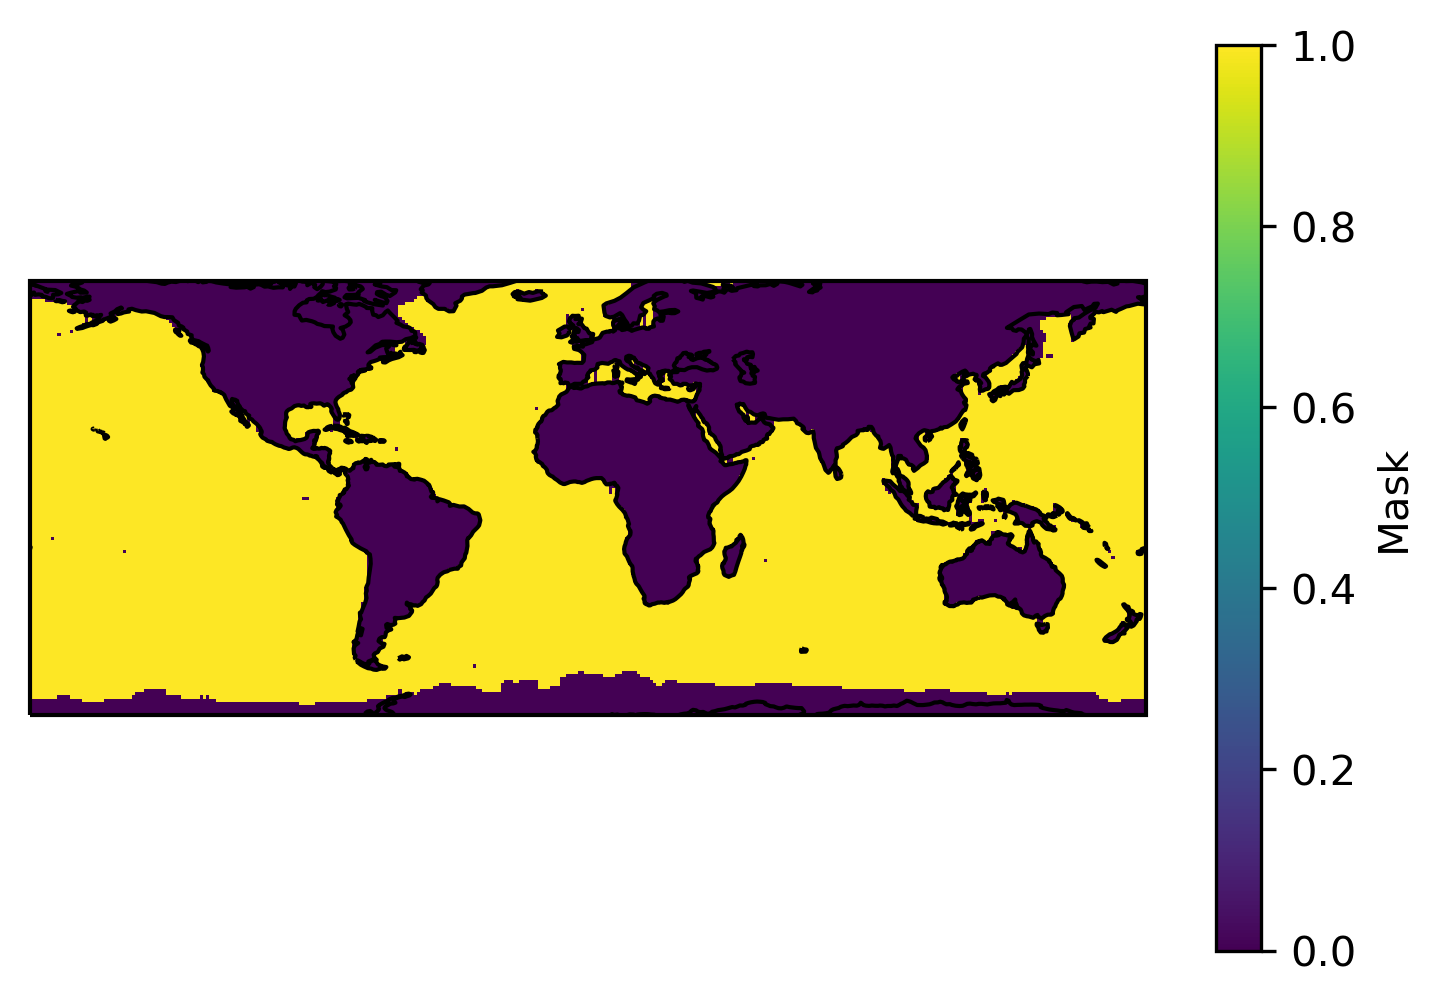

In [81]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

da = ds.mask

# Draw coastlines of the Earth
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
da.plot()
plt.rcParams['figure.dpi'] = 300
# plt.savefig('earth_sst_map_plot.pdf', dpi=300)
# plt.savefig('earth_sst_map_plot.png', dpi=1200)
# plt.savefig('earth_sst_map_plot_nodpi.pdf')
# plt.savefig('earth_sst_map_plot_nodpi.png')
plt.show()

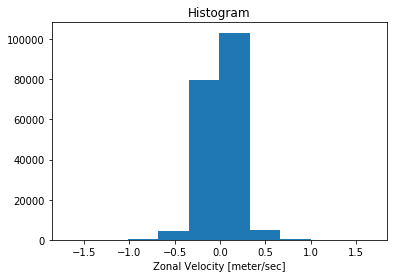

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

da = ds.u

da.plot()
plt.rcParams['figure.dpi'] = 300
plt.savefig('zonal_velocity_histogram.png', dpi=300)
plt.show()

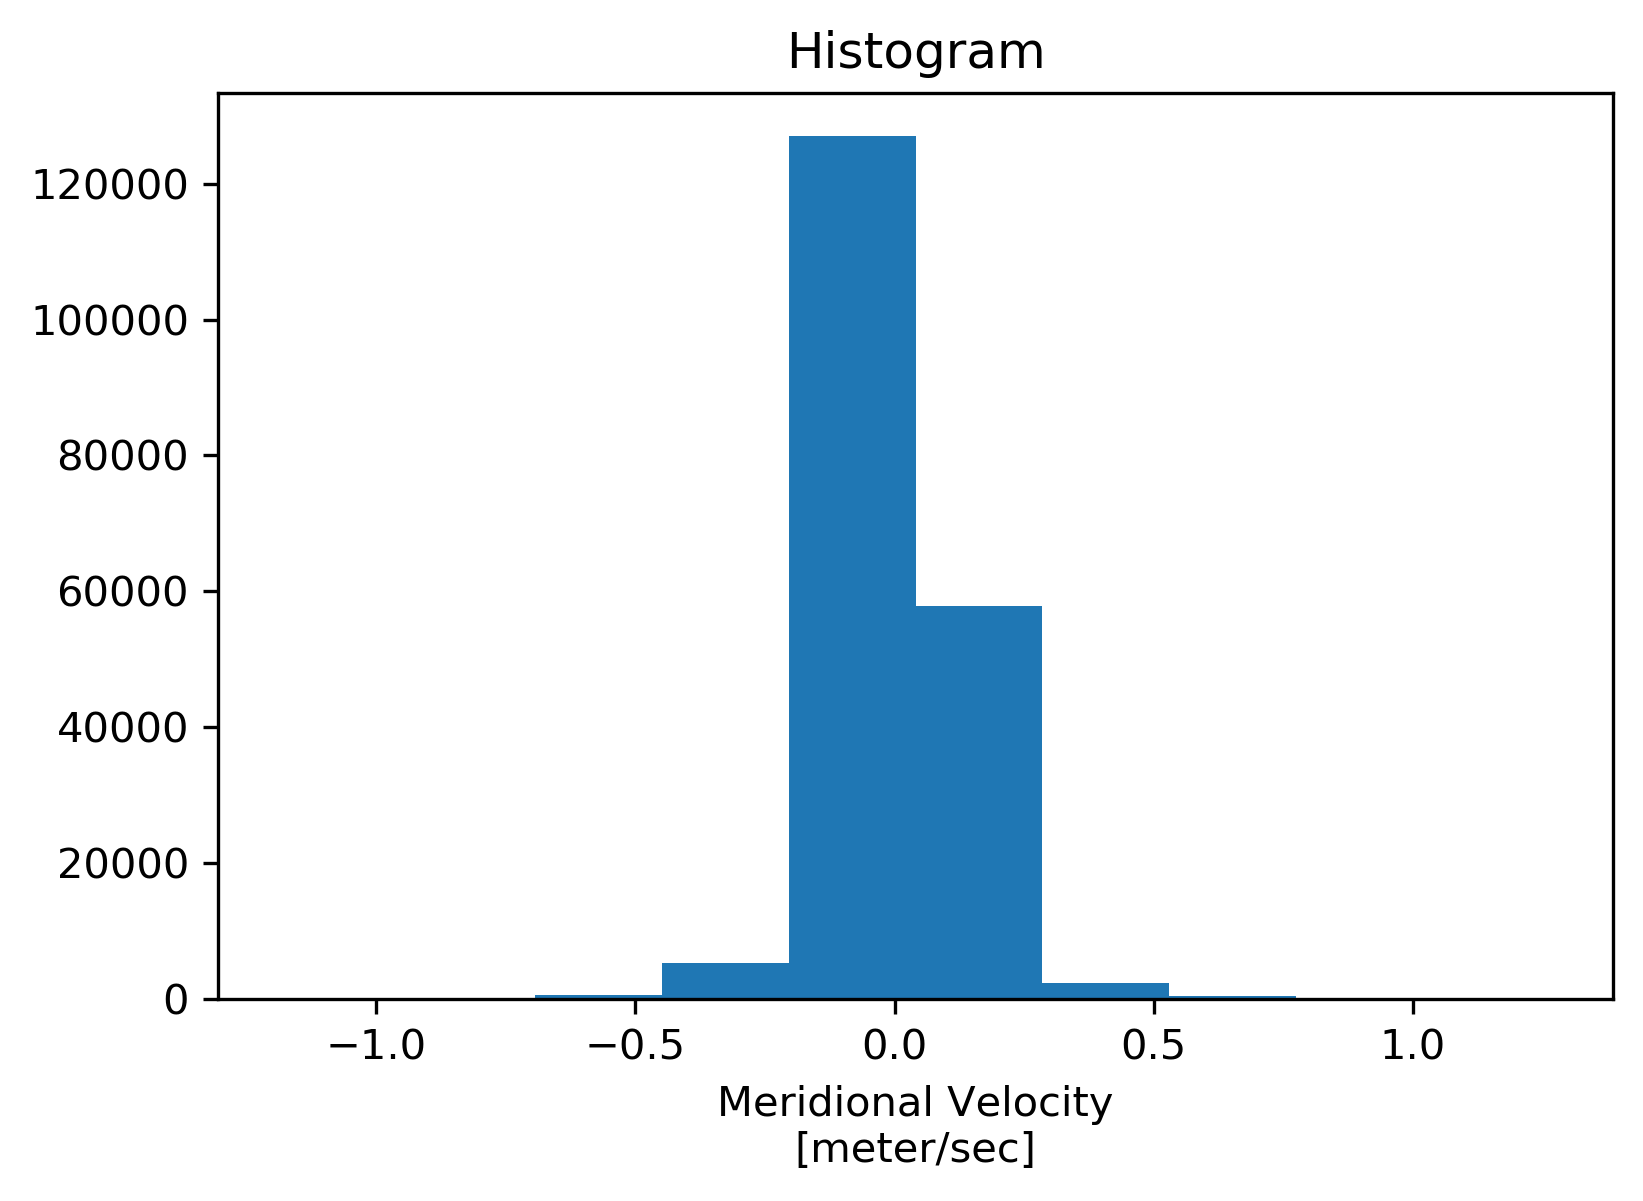

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

da = ds.v

da.plot()
plt.rcParams['figure.dpi'] = 300
plt.savefig('meridional_velocity_histogram.png', dpi=300)
plt.show()

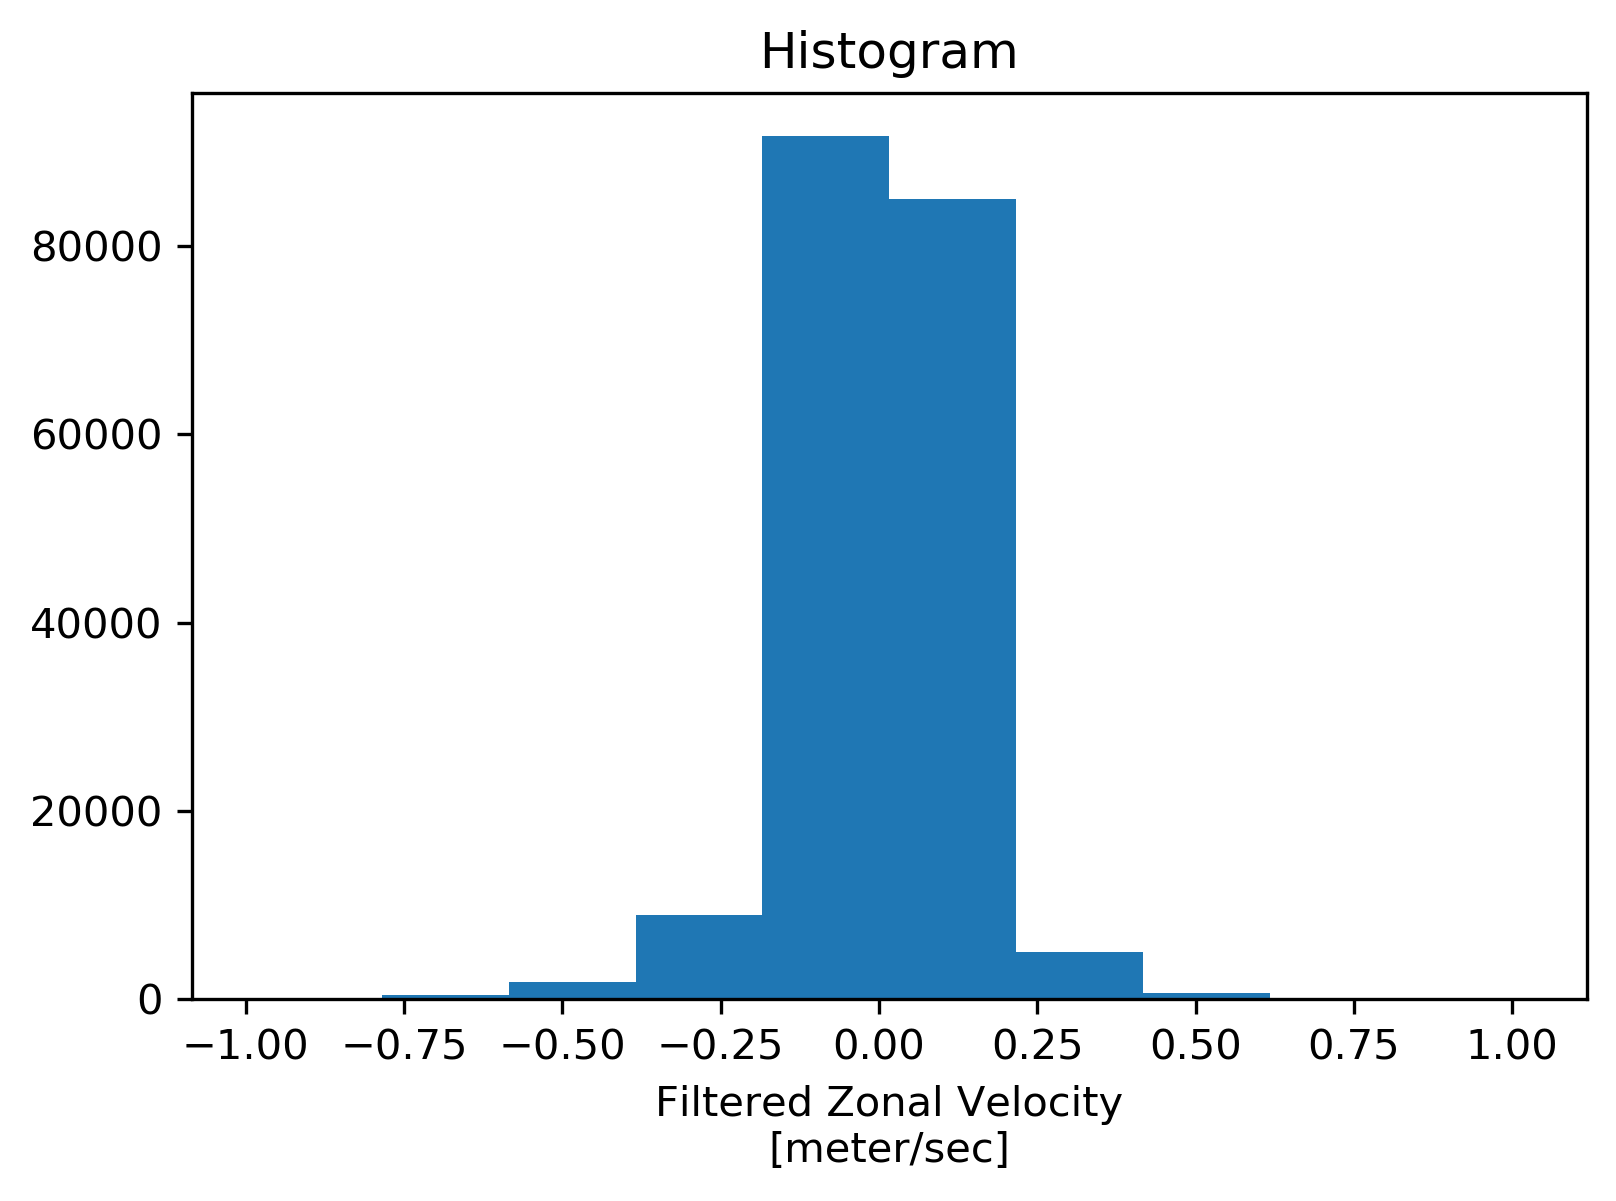

In [31]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

da = ds.uf

# Draw coastlines of the Earth
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.coastlines()
da.plot()
plt.rcParams['figure.dpi'] = 300
plt.show()

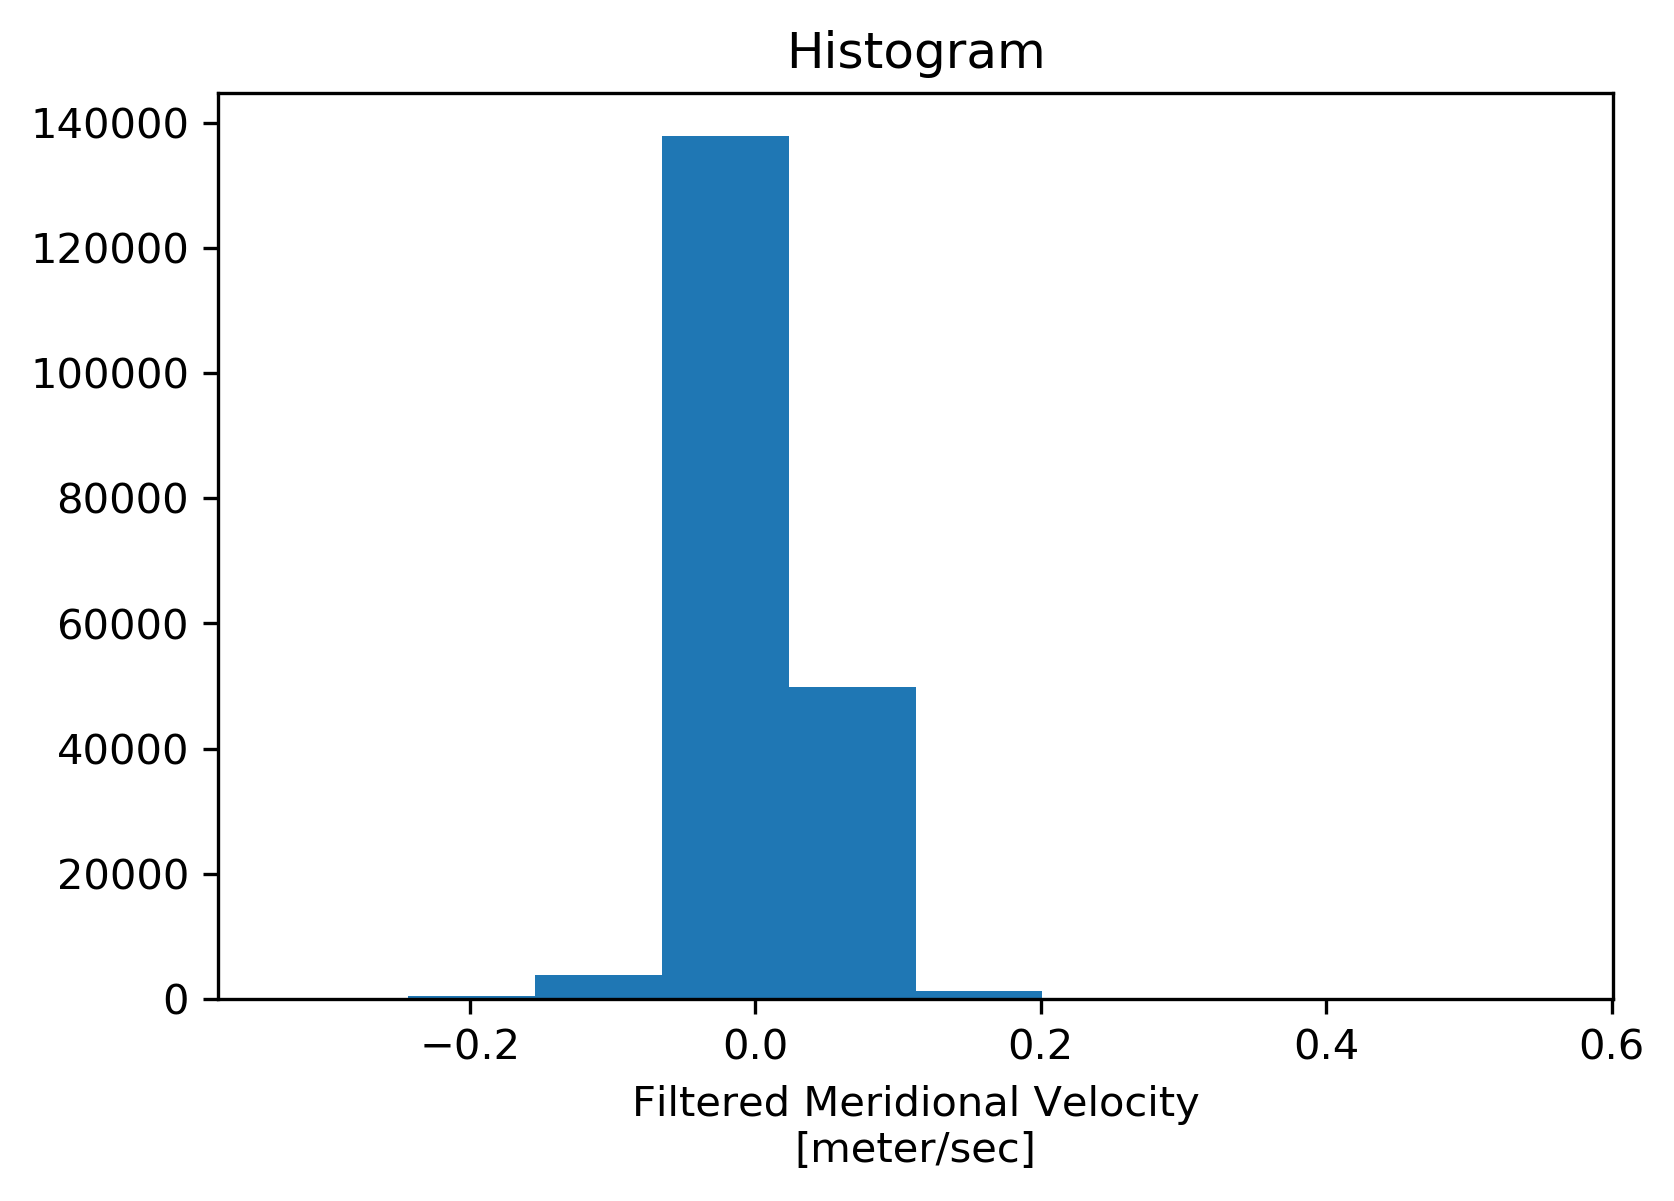

In [34]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

da = ds.vf

da.plot()
plt.rcParams['figure.dpi'] = 300
plt.show()